In [1]:
#Rider's fare prediction

## Problem Statement: Prediction of Fare
Type: Fare prediciton is classic problem to learn and apply lots of data analysis techniques to create best Regression model.

Given with the dataset consisting of details of rider's pickup location, pickup date-time,and dropoff location and the amount that is paid for the ride.  


In [2]:
### Step 1: Import the packages numpy,pandas,matplotlib,seaborn,sklearn,train test split,metrics

In [3]:
#basic & neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Regressors
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

#Model evaluation tools
from sklearn.metrics import accuracy_score, precision_score, mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#df processing functions
from sklearn.model_selection import train_test_split

#Warnings Handling
import warnings 
warnings.filterwarnings("ignore")

# pd.set_option("display.max_rows",None)
# pd.set_option("display.max_columns",None)

#date time
import datetime

In [4]:
### Step 2:Load the dataset

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")
df.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
### Step 3:Explore the data-shape,data visualisation

In [7]:
df.shape

(50000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [9]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [10]:
# checking & removing the duplicates
duplicate=df.duplicated()
print(duplicate.sum())

0


In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

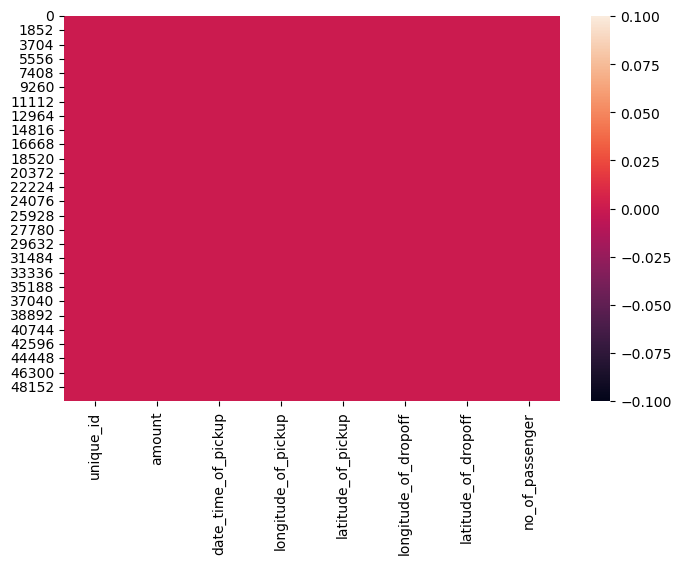

In [12]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())
plt.show()

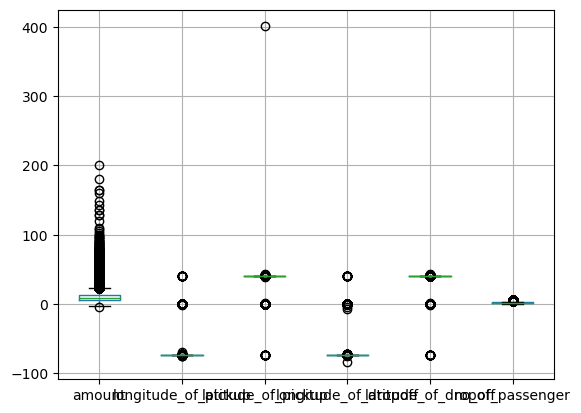

In [13]:
df.boxplot()
plt.show()

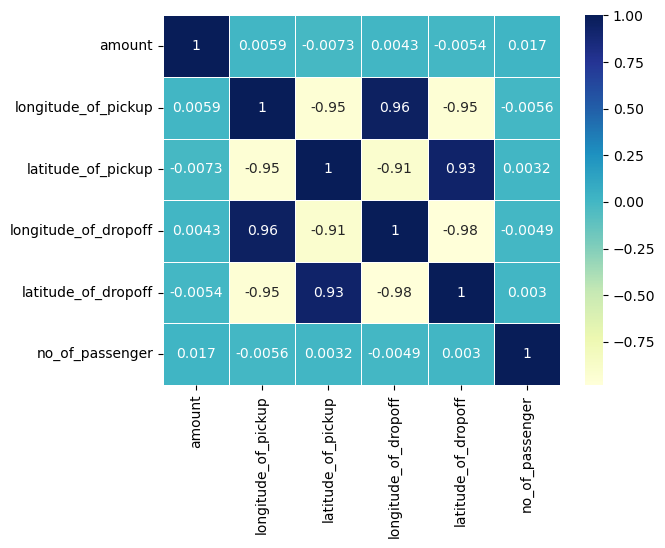

In [14]:
correlation_mat=df.corr()
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")
plt.show()

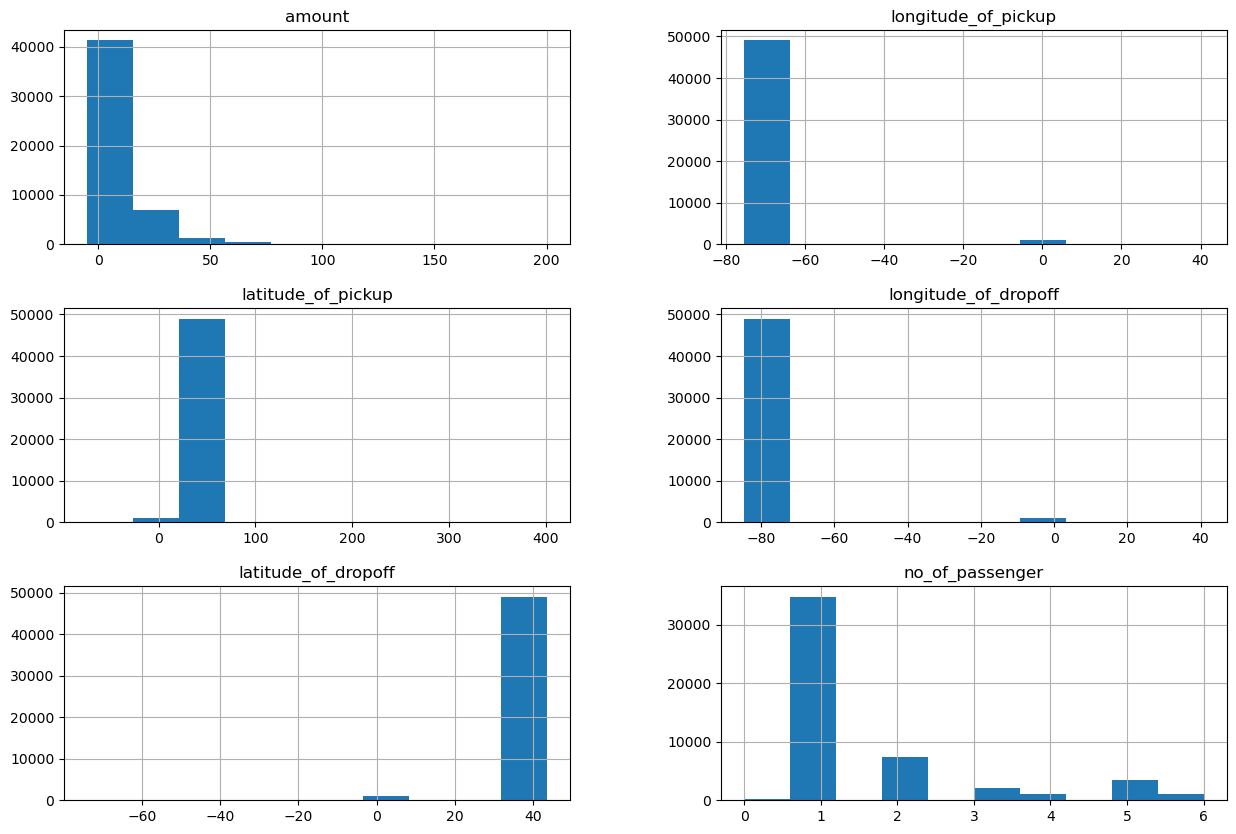

In [15]:
df.hist(figsize=(15,10))
plt.show()

In [16]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [17]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [18]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


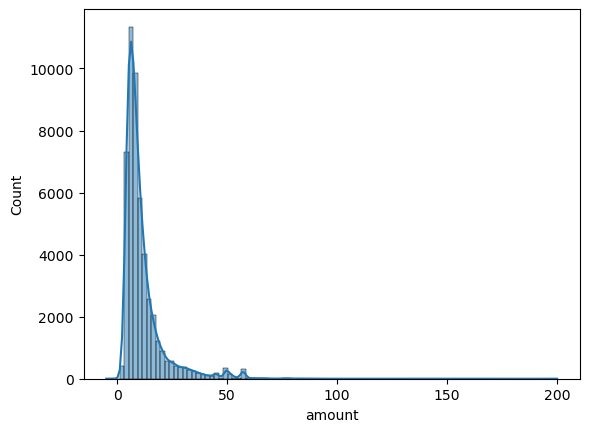

In [19]:
sns.histplot(data=df,x='amount',kde=True,bins=100)
plt.show()

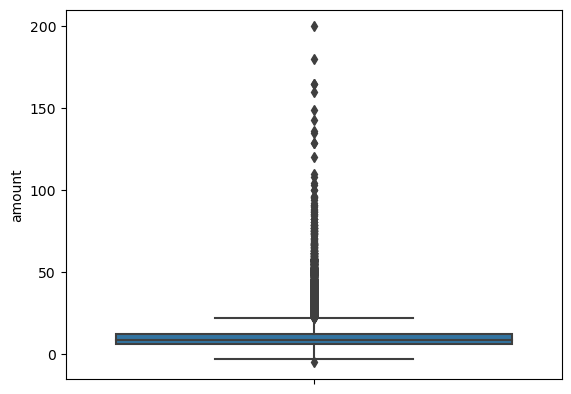

In [20]:
sns.boxplot(data=df,y='amount')
plt.show()

In [21]:
df=df[(df['amount']>=2.5)&(df['amount']<100)]


In [22]:
df["amount"].describe()

count    49972.000000
mean        11.322157
std          9.380253
min          2.500000
25%          6.000000
50%          8.500000
75%         12.500000
max         96.250000
Name: amount, dtype: float64

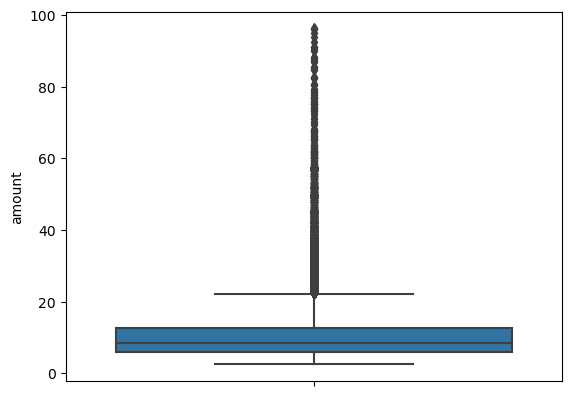

In [23]:
sns.boxplot(data=df,y='amount')
plt.show()

In [24]:
pd.to_datetime(df['date_time_of_pickup'])

0       2009-06-15 17:26:21+00:00
1       2010-01-05 16:52:16+00:00
2       2011-08-18 00:35:00+00:00
3       2012-04-21 04:30:42+00:00
4       2010-03-09 07:51:00+00:00
                   ...           
49995   2013-06-12 23:25:15+00:00
49996   2015-06-22 17:19:18+00:00
49997   2011-01-30 04:53:00+00:00
49998   2012-11-06 07:09:00+00:00
49999   2010-01-13 08:13:14+00:00
Name: date_time_of_pickup, Length: 49972, dtype: datetime64[ns, UTC]

In [25]:
df['date_time_of_pickup']=pd.to_datetime(df['date_time_of_pickup'])-datetime.timedelta(hours=4)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49972 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             49972 non-null  object             
 1   amount                49972 non-null  float64            
 2   date_time_of_pickup   49972 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   49972 non-null  float64            
 4   latitude_of_pickup    49972 non-null  float64            
 5   longitude_of_dropoff  49972 non-null  float64            
 6   latitude_of_dropoff   49972 non-null  float64            
 7   no_of_passenger       49972 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.4+ MB


In [27]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [28]:
df['date_time_of_pickup'].dt.month

0         6
1         1
2         8
3         4
4         3
         ..
49995     6
49996     6
49997     1
49998    11
49999     1
Name: date_time_of_pickup, Length: 49972, dtype: int64

In [29]:
df['Year']=df['date_time_of_pickup'].dt.year
df['Month']=df['date_time_of_pickup'].dt.month
df['Day']=df['date_time_of_pickup'].dt.day
df['Hours']=df['date_time_of_pickup'].dt.hour
df['Minutes']=df['date_time_of_pickup'].dt.minute
df.sample(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Hours,Minutes
15195,09:25.0,12.9,2011-10-09 10:09:25+00:00,-73.951200,40.785685,-73.983025,40.754772,1,2011,10,9,10,9
34336,14:12.0,12.0,2012-12-23 21:14:12+00:00,-73.974227,40.788940,-73.937949,40.812797,1,2012,12,23,21,14
40134,55:24.0,16.5,2013-10-13 08:55:24+00:00,-73.984644,40.764482,-73.960551,40.771195,1,2013,10,13,8,55
37832,23:00.0,6.5,2014-01-23 03:23:00+00:00,-73.953027,40.780055,-73.953027,40.780055,4,2014,1,23,3,23
17326,50:56.0,35.0,2013-12-19 05:50:56+00:00,-74.007620,40.741173,-73.870232,40.773071,1,2013,12,19,5,50


In [30]:
df['mornight']=np.where(df['Hours']<12,0,1)
df.sample(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Hours,Minutes,mornight
33737,09:34.0,12.1,2011-05-14 14:09:34+00:00,-73.991663,40.750224,-73.985014,40.710725,1,2011,5,14,14,9,1
23442,00:00.0,23.0,2013-02-02 08:00:00+00:00,-73.976435,40.764525,-74.010200,40.713707,1,2013,2,2,8,0,0
7175,59:48.0,7.0,2015-02-10 15:59:48+00:00,-73.986183,40.744160,-73.971603,40.749771,1,2015,2,10,15,59,1
24493,20:04.0,9.3,2011-07-18 02:20:04+00:00,-73.950075,40.779680,-73.982232,40.762666,1,2011,7,18,2,20,0
8081,32:20.0,15.3,2012-05-20 15:32:20+00:00,-73.971866,40.751292,-73.966486,40.804279,1,2012,5,20,15,32,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49972 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             49972 non-null  object             
 1   amount                49972 non-null  float64            
 2   date_time_of_pickup   49972 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   49972 non-null  float64            
 4   latitude_of_pickup    49972 non-null  float64            
 5   longitude_of_dropoff  49972 non-null  float64            
 6   latitude_of_dropoff   49972 non-null  float64            
 7   no_of_passenger       49972 non-null  int64              
 8   Year                  49972 non-null  int64              
 9   Month                 49972 non-null  int64              
 10  Day                   49972 non-null  int64              
 11  Hours                 49972 non-null  int64              
 12  Minu

In [32]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
Year                    0
Month                   0
Day                     0
Hours                   0
Minutes                 0
mornight                0
dtype: int64

In [33]:
# CALCULATING HAVERSIAN DISTANCE

def haversian_distance(lat1, lat2, lon1,lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

df['hav_distance'] = df.apply(lambda row:haversian_distance(row['latitude_of_pickup'],row['latitude_of_dropoff'],row['longitude_of_pickup'],row['longitude_of_dropoff']),axis=1)

In [34]:
# CALCULATING EUCLEDIAN DISTANCE

df['euc_distance'] = 69 * np.sqrt((np.array(df.longitude_of_dropoff) - np.array(df.longitude_of_pickup))**2 + (np.array(df.latitude_of_pickup) - np.array(df.latitude_of_dropoff))**2)

In [35]:
df.sample(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Hours,Minutes,mornight,hav_distance,euc_distance
4207,31:00.0,8.0,2014-05-21 09:31:00+00:00,-73.982170,40.774772,-73.973428,40.764502,1,2014,5,21,9,31,0,0.844258,0.930594
14798,09:00.0,8.5,2012-11-09 16:09:00+00:00,-73.967832,40.765737,-73.983307,40.744200,5,2012,11,9,16,9,1,1.694207,1.829890
20294,22:22.0,12.5,2011-04-05 05:22:22+00:00,-73.956570,40.784167,-73.979498,40.759035,1,2011,4,5,5,22,0,2.110594,2.347330
13265,34:00.0,11.0,2013-01-28 18:34:00+00:00,-73.984970,40.742037,-73.978225,40.772110,1,2013,1,28,18,34,1,2.107618,2.126589
42878,57:00.0,17.0,2014-12-12 17:57:00+00:00,-73.992462,40.694327,-73.924077,40.707495,1,2014,12,12,17,57,1,3.695833,4.805247


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49972 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             49972 non-null  object             
 1   amount                49972 non-null  float64            
 2   date_time_of_pickup   49972 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   49972 non-null  float64            
 4   latitude_of_pickup    49972 non-null  float64            
 5   longitude_of_dropoff  49972 non-null  float64            
 6   latitude_of_dropoff   49972 non-null  float64            
 7   no_of_passenger       49972 non-null  int64              
 8   Year                  49972 non-null  int64              
 9   Month                 49972 non-null  int64              
 10  Day                   49972 non-null  int64              
 11  Hours                 49972 non-null  int64              
 12  Minu

In [37]:
df.drop(["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"],axis=1,inplace=True)
df.sample(5)

,unique_id,amount,date_time_of_pickup,no_of_passenger,Year,Month,Day,Hours,Minutes,mornight,hav_distance,euc_distance
25780,26:00.0,14.1,2012-05-19 11:26:00+00:00,2,2012,5,19,11,26,0,2.997892,3.467058
20568,38:50.0,4.9,2010-02-18 17:38:50+00:00,1,2010,2,18,17,38,1,0.682724,0.687294
16346,24:26.0,10.0,2012-09-06 10:24:26+00:00,1,2012,9,6,10,24,0,0.934975,0.988588
6298,59:00.0,5.7,2011-03-05 15:59:00+00:00,1,2011,3,5,15,59,1,0.721337,0.720365
30742,25:24.0,11.5,2014-04-09 16:25:24+00:00,1,2014,4,9,16,25,1,1.902698,2.307873


In [38]:
df.drop(['unique_id'],axis=1,inplace=True)
df.sample(5)

,amount,date_time_of_pickup,no_of_passenger,Year,Month,Day,Hours,Minutes,mornight,hav_distance,euc_distance
42486,14.0,2014-07-08 16:46:58+00:00,1,2014,7,8,16,46,1,2.983963,3.242273
26154,5.7,2010-06-13 13:47:00+00:00,1,2010,6,13,13,47,1,1.130301,1.131543
26148,25.5,2013-03-06 22:17:00+00:00,1,2013,3,6,22,17,1,6.701058,7.015081
13294,9.3,2010-06-23 14:51:09+00:00,1,2010,6,23,14,51,1,1.398290,1.410822
9694,4.1,2009-05-04 07:49:50+00:00,1,2009,5,4,7,49,0,0.553303,0.645708


In [39]:
df.drop(['date_time_of_pickup'],axis=1,inplace=True)
df.sample(5)

,amount,no_of_passenger,Year,Month,Day,Hours,Minutes,mornight,hav_distance,euc_distance
38817,6.5,1,2012,11,16,18,33,1,1.433866,1.602793
49715,4.5,1,2012,3,14,4,13,0,0.514458,0.676185
35691,19.3,5,2010,12,7,16,1,1,5.804228,6.179803
23274,17.7,2,2012,7,25,17,59,1,3.682450,3.913611
37974,4.5,5,2013,10,8,16,13,1,0.259300,0.275669


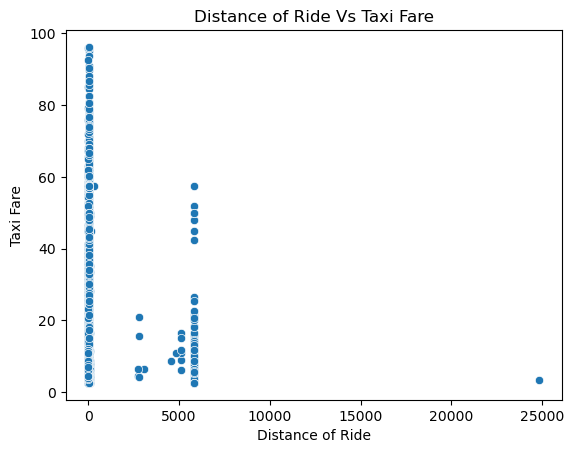

In [40]:
# Scatter Plot Between Eucledian Distance and Fare Amount

sns.scatterplot(x='euc_distance', y='amount', data=df)

plt.title('Distance of Ride Vs Taxi Fare')
# Set x-axis label
plt.xlabel('Distance of Ride')
# Set y-axis label
plt.ylabel('Taxi Fare')
plt.show()

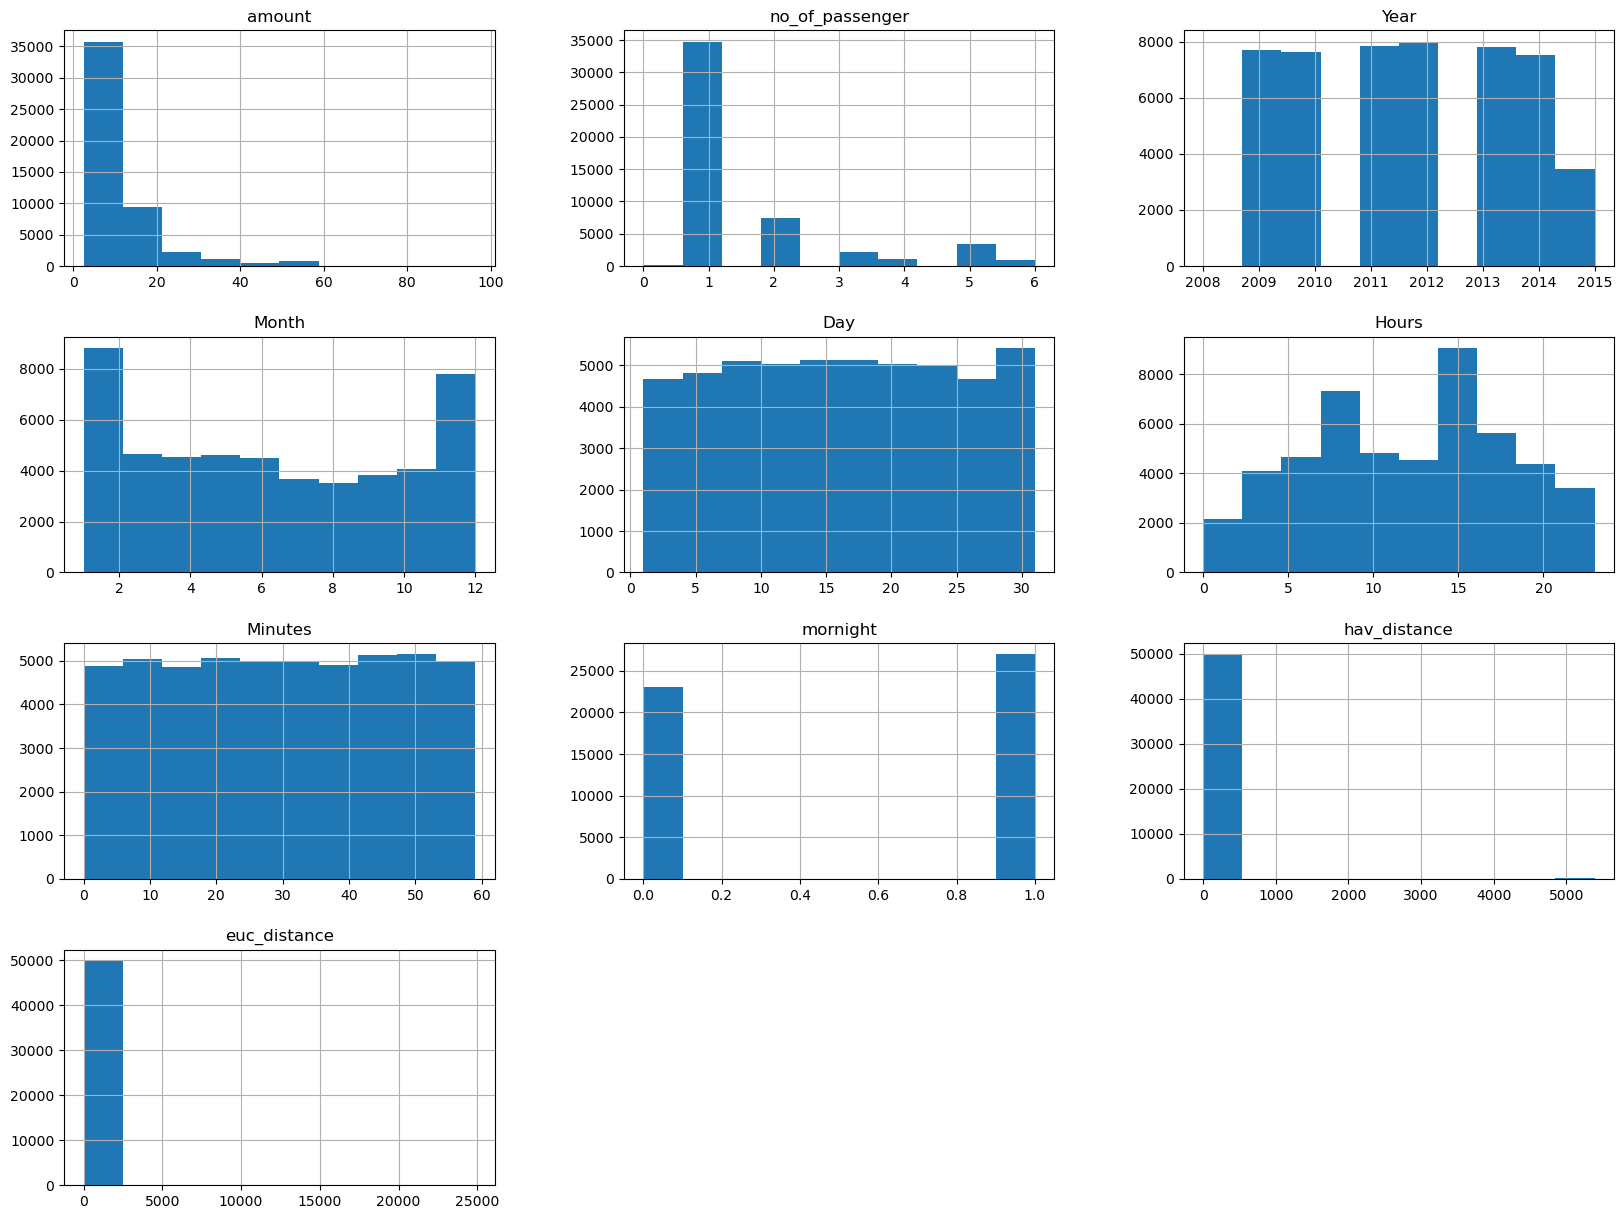

In [41]:
df.hist(figsize=(20,15))
plt.show()

In [42]:
df.dtypes

amount             float64
no_of_passenger      int64
Year                 int64
Month                int64
Day                  int64
Hours                int64
Minutes              int64
mornight             int32
hav_distance       float64
euc_distance       float64
dtype: object

In [43]:
### Step 4:x,y-->train data test data->Fit the model with training data  predict with the test data

In [44]:
x=df.drop(['amount'],axis=1)
y=df['amount']

In [45]:
x

,no_of_passenger,Year,Month,Day,Hours,Minutes,mornight,hav_distance,euc_distance
0,1,2009,6,15,13,26,1,0.640487,0.651073
1,1,2010,1,5,12,52,1,5.250670,5.499001
2,2,2011,8,17,20,35,1,0.863411,0.943509
3,1,2012,4,21,0,30,0,1.739386,1.748493
4,1,2010,3,9,3,51,0,1.242218,1.343397
...,...,...,...,...,...,...,...,...,...
49995,1,2013,6,12,19,25,1,3.069806,3.158942
49996,1,2015,6,22,13,19,1,0.543517,0.555367
49997,1,2011,1,30,0,53,0,1.406341,1.419575
49998,2,2012,11,6,3,9,0,0.413364,0.530345


In [46]:
y

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49995    15.0
49996     7.5
49997     6.9
49998     4.5
49999    10.9
Name: amount, Length: 49972, dtype: float64

In [47]:
from sklearn import preprocessing

In [48]:
lab=preprocessing.LabelEncoder()
y2=lab.fit_transform(y)

In [49]:
y2

array([ 11, 120,  20, ...,  31,  11,  63], dtype=int64)

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y2, test_size=0.2,random_state=1)

## Logistic Regression

In [51]:
lrc=LogisticRegression()
lrc.fit(X_train,Y_train)

LogisticRegression()

In [52]:
print(lrc.score(X_train,Y_train))
print(lrc.score(X_test,Y_test))

0.050303924756735126
0.04662331165582791


In [53]:
lrc_predict_y=lrc.predict(X_test)
print('R square:%.2f'%(r2_score(Y_test, lrc_predict_y)))
print('MAE:%.2f' %mean_absolute_error(Y_test, lrc_predict_y))
print('MSE:%.2f'%mean_squared_error(Y_test, lrc_predict_y))
print('RMSE:%f'%np.sqrt(mean_squared_error(Y_test, lrc_predict_y)))

R square:-0.22
MAE:55.79
MSE:13020.39
RMSE:114.106934


## DecisionTreeRegressor

In [54]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [55]:
print(dt.score(X_train,Y_train))
print(dt.score(X_test,Y_test))

1.0
0.6291279354408806


In [56]:
dt_predict_y=dt.predict(X_test)
print('R square:%.2f'%(r2_score(Y_test, dt_predict_y)))
print('MAE:%.2f' %mean_absolute_error(Y_test, dt_predict_y))
print('MSE:%.2f'%mean_squared_error(Y_test, dt_predict_y))
print('RMSE:%f'%np.sqrt(mean_squared_error(Y_test, dt_predict_y)))

R square:0.63
MAE:28.91
MSE:3947.26
RMSE:62.827187


## AdaBoostRegressor

In [57]:
ada=AdaBoostRegressor()
ada.fit(X_train,Y_train)

AdaBoostRegressor()

In [58]:
print(ada.score(X_train,Y_train))
print(ada.score(X_test,Y_test))

0.6878886210700241
0.6818215813257933


In [59]:
ada_predict_y=ada.predict(X_test)
print('R square:%.2f'%(r2_score(Y_test, ada_predict_y)))
print('MAE:%.2f' %mean_absolute_error(Y_test, ada_predict_y))
print('MSE:%.2f'%mean_squared_error(Y_test, ada_predict_y))
print('RMSE:%f'%np.sqrt(mean_squared_error(Y_test, ada_predict_y)))

R square:0.68
MAE:34.60
MSE:3386.43
RMSE:58.193022


## BaggingRegressor

In [60]:
br=BaggingRegressor()
br.fit(X_train,Y_train)

BaggingRegressor()

In [61]:
print(br.score(X_train,Y_train))
print(br.score(X_test,Y_test))

0.961948400872134
0.7826645411535526


In [62]:
br_predict_y=br.predict(X_test)
print('R square:%.2f'%(r2_score(Y_test, br_predict_y)))
print('MAE:%.2f' %mean_absolute_error(Y_test, br_predict_y))
print('MSE:%.2f'%mean_squared_error(Y_test, br_predict_y))
print('RMSE:%f'%np.sqrt(mean_squared_error(Y_test, br_predict_y)))

R square:0.78
MAE:22.54
MSE:2313.14
RMSE:48.095102


In [63]:
brR=BaggingRegressor(base_estimator=dt)
brR.fit(X_train,Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor())

In [64]:
print(brR.score(X_train,Y_train))
print(brR.score(X_test,Y_test))

0.962844090603845
0.7947252204008591


In [65]:
brR_predict_y=brR.predict(X_test)
print('R square:%.2f'%(r2_score(Y_test, brR_predict_y)))
print('MAE:%.2f' %mean_absolute_error(Y_test, brR_predict_y))
print('MSE:%.2f'%mean_squared_error(Y_test, brR_predict_y))
print('RMSE:%f'%np.sqrt(mean_squared_error(Y_test, brR_predict_y)))

R square:0.79
MAE:22.29
MSE:2184.77
RMSE:46.741576


## RandomForestRegressor

In [66]:
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [67]:
print(rfr.score(X_train,Y_train))
print(rfr.score(X_test,Y_test))

0.9724118547415599
0.8044229363491635


In [68]:
rfr_predict_y=rfr.predict(X_test)
print('R square:%.2f'%(r2_score(Y_test, rfr_predict_y)))
print('MAE:%.2f' %mean_absolute_error(Y_test, rfr_predict_y))
print('MSE:%.2f'%mean_squared_error(Y_test, rfr_predict_y))
print('RMSE:%f'%np.sqrt(mean_squared_error(Y_test, rfr_predict_y)))

R square:0.80
MAE:21.31
MSE:2081.56
RMSE:45.624121


In [69]:
rfrR=RandomForestRegressor(max_depth=5)
rfrR.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5)

In [70]:
print(rfrR.score(X_train,Y_train))
print(rfrR.score(X_test,Y_test))

0.8136300489199595
0.8100835532933973


In [71]:
rfrR_predict_y=rfrR.predict(X_test)
print('R square:%.2f'%(r2_score(Y_test, rfrR_predict_y)))
print('MAE:%.2f' %mean_absolute_error(Y_test, rfrR_predict_y))
print('MSE:%.2f'%mean_squared_error(Y_test, rfrR_predict_y))
print('RMSE:%f'%np.sqrt(mean_squared_error(Y_test, rfrR_predict_y)))

R square:0.81
MAE:21.82
MSE:2021.31
RMSE:44.959021


## GradientBoostingRegressor

In [72]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [73]:
print(gbr.score(X_train,Y_train))
print(gbr.score(X_test,Y_test))

0.8300947738814133
0.8186569350682239


In [74]:
gbr_predict_y=gbr.predict(X_test)
print('R square:%.2f'%(r2_score(Y_test, gbr_predict_y)))
print('MAE:%.2f' %mean_absolute_error(Y_test, gbr_predict_y))
print('MSE:%.2f'%mean_squared_error(Y_test, gbr_predict_y))
print('RMSE:%f'%np.sqrt(mean_squared_error(Y_test, gbr_predict_y)))

R square:0.82
MAE:20.64
MSE:1930.07
RMSE:43.932511
